# $$Análises~de~Correspondências~Simples~(ANACOR)$$

## $$Conceito$$

- Técnica não supervisionada(Diagnostica), que visa a redução de dimensão da base de dados


- Trabalhar com dados que se manifestam de forma qualitativa, não possuindo a intenção de se fazer predições para observações não presentes na amostra


- Quando o número de variáveis de interesse for igual a 2, utilizaremos as Análises de Correspondências Simples (ANACOR); por outro lado, quando o número de variáveis de interesse for maior do que 2, utilizaremos as Análises de Correspondências Múltiplas (ACM)


- A ideia, portanto, é a de se estudar as relações de interdependência em razão das associações entre as categorias das variáveis de interesse, O grande objetivo das Análises de Correspondências é o estabelecimento de um mapa perceptual. O mapa perceptual é uma espécie de gráfico que utilizará coordenadas que representarão as linhas e as colunas de uma tabela de contingências.


- Conseguimos extrair dados métricos de uma variável categórica usando analise de correspondência

# Objetivo: Criar um mapa perceptual do perfil investidor dos clientes 

In [1]:
#Pacotes
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt

# Banco de dados 

In [2]:
#Base de dados
dados = pd.read_csv('perfil_investidor.csv',encoding='latin-1')
dados = dados.set_index('estudante')
dados

,perfil,aplicacao
estudante,,
Gabriela,Conservador,Poupanca
Luiz Felipe,Conservador,Poupanca
Patrícia,Conservador,Poupanca
Gustavo,Conservador,Poupanca
Letícia,Conservador,Poupanca
...,...,...
Sheila,Agressivo,Acoes
Pedro,Agressivo,Acoes
Horácio,Agressivo,Acoes


**Tabela com 100 observações e 2 variáveis**

In [3]:
#Labels
print(dados.perfil.unique())
print(dados.aplicacao.unique())


['Conservador' 'Moderado' 'Agressivo']
['Poupanca' 'CDB' 'Acoes']


**Cada variável possui 3 labels cada**

In [4]:
#Frequência das labels na variável perfil
dados.perfil.value_counts()

Agressivo      58
Moderado       25
Conservador    17
Name: perfil, dtype: int64

In [5]:
#Frequencia das labels na variável aplicacao
dados.aplicacao.value_counts()

Acoes       45
CDB         40
Poupanca    15
Name: aplicacao, dtype: int64

## $$PRIMEIRO~PASSO:$$


- A Construção de uma Tabela de Frequências Observadas 

In [6]:
#Tabela de Contingências = Valores Observados
tab_cont = pd.crosstab(dados.perfil,dados.aplicacao,margins=True)
tab_cont

aplicacao,Acoes,CDB,Poupanca,All
perfil,,,,
Agressivo,36,20,2,58
Conservador,5,4,8,17
Moderado,4,16,5,25
All,45,40,15,100


**Cruzamento entre pares de 2 variáveis categóricas**

**Tabela de Contingências é a chave para construção da ANACOR, através dela que conseguimos extrair os Auto Valores e Auto Vetores**

## $$SEGUNDO~PASSO:$$




 ## Estudo das Associações entre as Categorias das Variáveis de Interesse 

**Para o estudo das associações entre as categorias das variáveis, utilizaremos dois instrumentos: o Teste 𝜒2 e a análise dos resíduos padronizados ajustados**


- O **Teste 𝜒2** estudará se as associações entre as categorias das variáveis se associam, ou não, de forma aleatória, caso o p_valor seja < 0.05, rejeitamos a hipótese nula que diz que as duas variáveis categóricas se associam de forma aleatória e pelo menos 1 categoria se mostrará correlacionada com outra


- Logo, deveremos estabelecer uma matriz de valores esperados e, a seguir, uma matriz de resíduos – isso bastará para o Teste 𝜒2


- A **análise dos resíduos padronizados ajustados** revelará os padrões característicos de cada categoria, caso o valor entre 2 variáveis for maior que 1.96, elas se mostraram correlacionadas



- No caso da análise dos resíduos padronizados ajustados, devemos utilizar a matriz de resíduos para definir uma matriz de resíduos padronizados. Após isso, conseguimos estabelecer uma matriz de resíduos padronizados ajustados.


## Contruir a tabela de frequência esperada

In [7]:
# frequência esperada
_,_,_,valores_esperados = stats.chi2_contingency(tab_cont)

#Tabela de frequência esperada
tab_esp = pd.DataFrame(valores_esperados,columns=tab_cont.columns)
tab_esp['perfil'] = tab_cont.index
tab_esp = tab_esp.set_index('perfil')
tab_esp

aplicacao,Acoes,CDB,Poupanca,All
perfil,,,,
Agressivo,26.10,23.2,8.70,58.0
Conservador,7.65,6.8,2.55,17.0
Moderado,11.25,10.0,3.75,25.0
All,45.00,40.0,15.00,100.0


**Contagem de observações que se esperaria, em média, se as variáveis fossem independentes, sem nenhum grau de correlação**

## Tabela de Resíduos 

In [8]:
#Residuos 
resi = tab_cont - tab_esp
resi = resi.iloc[0:3,0:3]
resi

aplicacao,Acoes,CDB,Poupanca
perfil,,,
Agressivo,9.90,-3.2,-6.70
Conservador,-2.65,-2.8,5.45
Moderado,-7.25,6.0,1.25


**Diferença entre as tabelas dos valores observados e dos valores esperados, soma dos resíduos será sempre 0, com a tabela de resíduos podemos fazer o teste Chi²**

## Teste chi²

**São hipóteses do Teste 𝜒2:**


- H0: as duas variáveis categóricas se associam de forma aleatória
    
    
- 𝐻1: as duas variáveis categóricas não se associam de forma aleatória

In [9]:
#Matriz chi²
x2 = resi**2 / tab_esp.iloc[0:3,0:3]
x2

aplicacao,Acoes,CDB,Poupanca
perfil,,,
Agressivo,3.755172,0.441379,5.159770
Conservador,0.917974,1.152941,11.648039
Moderado,4.672222,3.600000,0.416667


**A matriz Chi² é construída através dos resíduos ao quadrado dividido pelos valores esperados**

In [10]:
#Valor Chi² (Soma da matriz chi²)
Valor_chi2 = np.array(x2).sum()
Valor_chi2

31.764164976335362

**O valor Chi² é calculado através da soma da matriz chi², com esse valor podemos rejeitar ou não a hipótese nula a um nível de confiança de 95%**

**OBS: Para saber se o valor Chi² 31.76 é maior ou menor que o valor critico, temos que usar o algoritimo do teste Chi² e observar o P_valor, caso ele seja < 0.05, as duas variáveis categóricas não se associam de forma aleatória**

In [11]:
#Teste chi²
chi2, pvalor, graus_liberdade, _ = stats.chi2_contingency(tab_cont)
pvalor

0.0002187073702990959

**P_valor < 0.05, rejeita-se H0, as duas variáveis categóricas não se associam de forma aleatória, portanto há ANACOR**

## Outra maneira de construir o teste Chi²

In [12]:
#Valor do chi²

#Grau de liberdade = (numero de linha da tabela de contingencia - 1) * (Numero de coluna da tabela de contingencia - 1) 
tab_gl = pd.crosstab(dados.perfil,dados.aplicacao)

nl = tab_gl.shape[0] # numero de linha 
nc = tab_gl.shape[1] # numero de Colunas 

gl = (nl -1)*(nc-1)#Formula do gl
print(f'Graus de Liberdade: {gl}')

#Valor Critico
from scipy.special import chdtri
va_c = chdtri(4,0.05) #Graus de liberdade e nivel de significancia

print(f'Valor Critico: {va_c}')
print(f'Valor do chi²: {Valor_chi2}')

Graus de Liberdade: 4
Valor Critico: 9.487729036781158
Valor do chi²: 31.764164976335362


**Como o valor do chi² foi maior que o valor critico, então rejeitamos a hipótese nula, que diz que as duas variáveis categóricas se associam de forma aleatória**

# 1° Conclusão:

**Caso o teste Chi² não rejeitasse a hipótese nula, o problema acabaria aqui, pois não haveria ANACOR, porém o teste rejeitou H0, portanto há pelos menos 1 associação entre as categorias das variáveis, e para saber qual ou quais são essas categorias, criaremos a tabela de resíduos padronizados ajustados**

# Resíduos padronizados ajustados

**Podemos interpretar os resíduos padronizados ajustados, para a nossa análise, como a força da associação entre as categorias, análogo a uma matriz de correlação de Pearson**

**OBS: Precisamos construir a tabela dos Resíduos padronizados para criar a tabela dos Resíduos padronizados ajustados**

## 1° Criar a tabela de resíduos padronizados

In [13]:
#Residuos padronizados
res_padro = (resi/np.sqrt(tab_esp.iloc[0:3,0:3]))
res_padro

aplicacao,Acoes,CDB,Poupanca
perfil,,,
Agressivo,1.937827,-0.664364,-2.271513
Conservador,-0.958110,-1.073751,3.412922
Moderado,-2.161532,1.897367,0.645497


**Os resíduos padronizados serve para calcular os valores dos resíduos padronizados ajustados**

## 2° Criar a tabela de resíduos padronizados ajustados


In [14]:
#Tabela de contingencia excluindo a bordas das somas
Tabl_conting = tab_cont.iloc[0:3,0:3]

#Transformando a tabela de frequencia observada em um array
n = np.matrix(Tabl_conting, dtype = float)

#Capturar a soma do total das colunas
cont_sum_row = n.sum(axis=1)
#Capturar a soma do total das Linhas
cont_sum_col = n.sum(axis=0)

#Residuos padronizados ajustados
residuo_std_ajst = np.divide(res_padro,
                       np.sqrt(np.multiply(
                           (1-(cont_sum_col/n.sum())),
                           (1-(cont_sum_row/n.sum())))))
residuo_std_ajst = np.around(residuo_std_ajst, decimals = 2)

residuo_std_ajst

aplicacao,Acoes,CDB,Poupanca
perfil,,,
Agressivo,4.03,-1.32,-3.80
Conservador,-1.42,-1.52,4.06
Moderado,-3.37,2.83,0.81


**Para construir a tabela dos Resíduos padronizados ajustado, precisamos fazer os cálculos com a tabela de Frequência observada e com a tabela de resíduos padronizados**

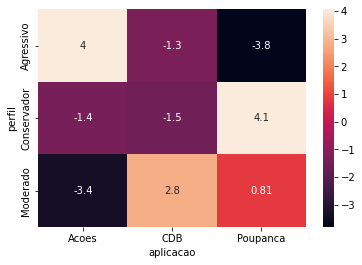

In [15]:
#Residuos padronizados ajustados com heatmap
import seaborn as sns
ax = sns.heatmap(residuo_std_ajst, annot=True)

### Interpretação dos Resíduos padronizados ajustado:

**Valores maiores que 1.96, diz respeito o quanto uma categoria está atraindo mais uma variável para si, neste caso podemos observar que a label 'Agressivo' da variável perfil está tendo uma atração maior pela label 'Acoes' da variavel aplicação, a label 'Conservador' atraída pela label 'Poupanca' e a label 'Moderado' atraída pela label 'CDB'**

## $$TERCEIRO~ PASSO:$$


## Decomposição da Inércia Principal Total (𝐖 = 𝐀′𝐀)

- O Teste 𝜒2 consegue apontar se associação entre as categorias de dadas variáveis se dá, ou não, de forma aleatória. Porém, o Teste 𝜒2 aumenta à medida que o numero de amostras aumenta. Então, no lugar de decompor o 𝜒2 para realizarmos a análise de correspondência, padronizaremos em razão do tamanho amostral, para então, decompô-lo.



- A decomposição inercial para a elaboração da análise de correspondência perpassa pela extração dos eigenvalues de uma matriz 𝐖, dada por 𝐖 = 𝐀′𝐀,em que 𝐀 = 𝐃𝑙¹².(𝐏 − 𝑙𝑐′). 𝐃𝑐¹²


In [16]:
#Decomposição da inércia principal total = Valor Chi² / tamanho da amostra
It = Valor_chi2/len(dados)
It

0.31764164976335363

**Soma dos Eigenvalues é o mesmo valor da Inercia principal total**

## Determinação dos Eigenvalues para a Decomposição Inercial

- Quantidade 𝑚 de eigenvalues é dada por 𝑚 = mín(𝐼 − 1,𝐽 − 1).

In [17]:
#Tabela de Contingências sem a margem , para calcular o valor do m
tab_obs = pd.crosstab(dados.perfil,dados.aplicacao,margins=False)
len(tab_obs.columns) #Numero de Colunas
len(tab_obs) #Numero de linhas

m_col = (len(tab_obs.columns))-1
m_linha = (len(tab_obs))-1

print(f'Minimo do numero de Colunas: {m_col}')
print(f'Minimo do numero de linhas: {m_linha}\n')

print(f'Numero de eigenvalues é = 2')

Minimo do numero de Colunas: 2
Minimo do numero de linhas: 2

Numero de eigenvalues é = 2


**Note que os dados vão ser representados através de 2 dimensões, porém não sabemos a porcentagem que será explicada de cada eixo**

## 1° Criar a Matriz P (frequências relativas observadas)

In [18]:
#1° Matriz p 
p = round(tab_cont/len(dados),2)
p

aplicacao,Acoes,CDB,Poupanca,All
perfil,,,,
Agressivo,0.36,0.20,0.02,0.58
Conservador,0.05,0.04,0.08,0.17
Moderado,0.04,0.16,0.05,0.25
All,0.45,0.40,0.15,1.00


**A soma relativa das variáveis 'perfil' e 'aplicacao' serão as massas das linhas e das colunas para o cálculo da Matriz W porém para o cálculo da matriz P, ela não vem com a soma relativa dos dados**

In [19]:
#1° Matriz p 
P = round(tab_obs/len(dados),2)
P

aplicacao,Acoes,CDB,Poupanca
perfil,,,
Agressivo,0.36,0.20,0.02
Conservador,0.05,0.04,0.08
Moderado,0.04,0.16,0.05


**Matriz P no formato correto**

## 2° Massas de linhas e Colunas

- Calculadas as frequências relativas observadas, presentes na matriz 𝐏(Tabela acima), podemos entender o conceito de massa (profiles) como medidas influência de determinada categoria em relação às demais. Nós precisaremos dessas massas para prosseguirmos para a decomposição dos eigenvalues

In [20]:
# 2° Massas de linhas e Colunas

Tabl_conting # Tabela de contingencia sem as margens
tab_cont # Tabela de contingencia com as margens

#Column Profiles = Massa das linhas
col_prof = round(Tabl_conting/tab_cont.iloc[3,:].values[0:3],2)

#Criar a Coluna das Massa_media
col_prof['Massa_media'] = tab_cont.iloc[:,3].values[0:3]/ 100
teste = pd.DataFrame(round(col_prof.sum(axis=0),1)).T
teste = teste.rename(index={0: "Total"})
col_prof = pd.concat([col_prof,teste]) 



#Row Profiles = Massas das Colunas
row_prof = round(Tabl_conting.T/tab_cont.iloc[:,3].values[0:3],2)
row_prof = row_prof.T

#Criar a linha das Massa_media
Massa_media_row = pd.DataFrame(tab_cont.iloc[3,:].values[0:3]/ 100).T
Massa_media_row.columns = P.columns
Massa_media_row = Massa_media_row.rename(index={0: "Massa_media"})
row_prof = pd.concat([row_prof,Massa_media_row]) 
row_prof['Total'] = round(row_prof.sum(axis=1),1)


In [21]:
#Row Profiles = Massas das Colunas
row_prof

aplicacao,Acoes,CDB,Poupanca,Total
Agressivo,0.62,0.34,0.03,1.0
Conservador,0.29,0.24,0.47,1.0
Moderado,0.16,0.64,0.20,1.0
Massa_media,0.45,0.40,0.15,1.0


In [22]:
print(len(dados[dados.aplicacao=='Acoes']))
print(len(dados[dados.aplicacao=='CDB']))
print(len(dados[dados.aplicacao=='Poupanca']))

45
40
15


**A massa média da Row Profiles se dá pela frequência relativa da coluna 'aplicaçao' de cada label**

In [23]:
#Column Profiles = Massa das linhas
col_prof

aplicacao,Acoes,CDB,Poupanca,Massa_media
Agressivo,0.80,0.5,0.13,0.58
Conservador,0.11,0.1,0.53,0.17
Moderado,0.09,0.4,0.33,0.25
Total,1.00,1.0,1.00,1.00


In [24]:
print(len(dados[dados.perfil=='Conservador']))
print(len(dados[dados.perfil=='Moderado']))
print(len(dados[dados.perfil=='Agressivo']))

17
25
58


**A massa média da Column Profiles se dá pela frequência relativa da coluna 'perfil' de cada label**

## 3° Definições das matrizes 𝐃𝒍 e 𝐃c

- Fazer as Column Profiles e as Row Profiles virarem diagonais principais

In [25]:
#Diagonal das Colunas(Somente das massas médias)
C = pd.DataFrame(np.diag(row_prof.iloc[3,:3]))
C

,0,1,2
0,0.45,0.0,0.00
1,0.00,0.4,0.00
2,0.00,0.0,0.15


**Massa das Linhas**

In [26]:
#Diagonal das linhas(Somente das massas)
L = pd.DataFrame(np.diag(col_prof.Massa_media[0:3]))
L

,0,1,2
0,0.58,0.00,0.00
1,0.00,0.17,0.00
2,0.00,0.00,0.25


**Massa das Colunas**

## 4° Matriz lc'

- Multiplicação das massas das colunas VS massas das linhas transpostas

- Sendo 𝐂, a matriz que contém as massas das column profiles de cada célula considerada; e 𝐋, a matriz que contém as massas das row
profiles de cada célula considerada, a matriz 𝑙𝑐' é definida por: 

- 𝒍𝒄' = C ⊗ L'

In [27]:
#Matriz lc'
lc = pd.DataFrame(np.dot(pd.DataFrame(np.diag(C)) , pd.DataFrame(np.diag(L)).T))
lc = lc.T

#Add nome nas colunas e linhas
lc.columns = row_prof.columns[0:3]
lc.index = col_prof.index[0:3]
lc

aplicacao,Acoes,CDB,Poupanca
Agressivo,0.2610,0.232,0.0870
Conservador,0.0765,0.068,0.0255
Moderado,0.1125,0.100,0.0375


**Agora com todas as matrizes calculadas, conseguimos calcular a Matriz A, para extrair os Eigenvalues e Eigenvectors**

## 5° Matriz A

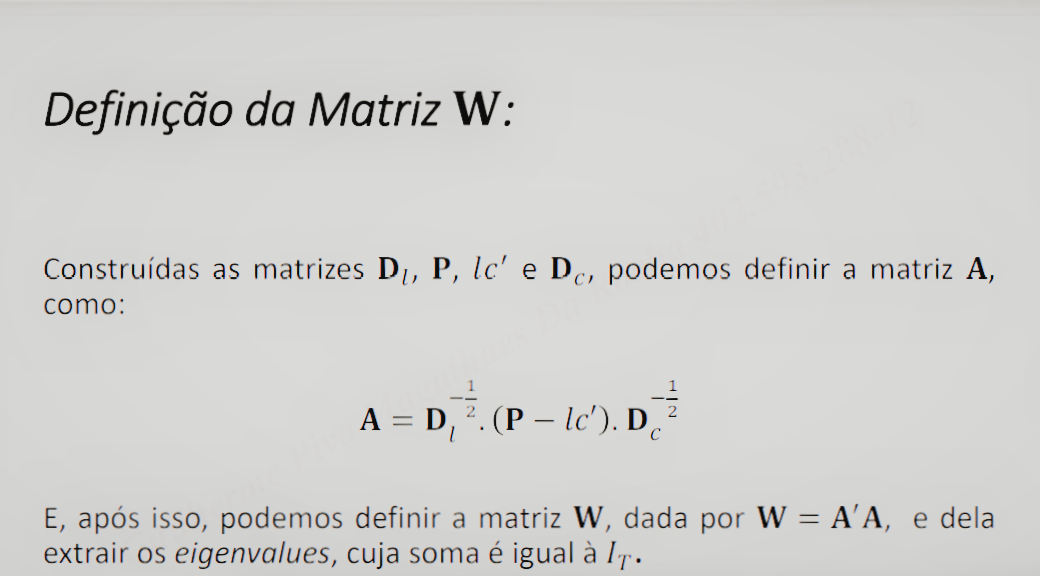

In [28]:
from IPython.display import Image
Image(filename="matrizA.png")

## Calculo da Matriz A:

- 𝐀 = 𝐃𝑙¹².(𝐏 − 𝑙𝑐′). 𝐃𝑐¹²

In [29]:
#Decompondo a formula da Matriz A 

# 𝐃𝑙¹²
Dl = L**-0.5
Dl = Dl.replace(np.inf, 0)
Dl = np.array(Dl)

# 𝐃𝑐¹²
Dc = C**-0.5
Dc = Dc.replace(np.inf, 0)
Dc = np.array(Dc)

#(𝐏 − 𝑙𝑐′)
P_lc = np.array(P-lc)


#Criando a Matriz A : (𝐀 = 𝐃𝑙¹².(𝐏 − 𝑙𝑐′). 𝐃𝑐¹²)
Matriz_Dl_P_lc = np.dot(Dl,P_lc)
matriz_A = pd.DataFrame(np.dot(Matriz_Dl_P_lc,Dc),columns=lc.columns)
matriz_A.index = lc.index
matriz_A

aplicacao,Acoes,CDB,Poupanca
Agressivo,0.193783,-0.066436,-0.227151
Conservador,-0.095811,-0.107375,0.341292
Moderado,-0.216153,0.189737,0.064550


**Poderíamos extrair os Eigenvalues da matriz A, porém muitas vezes podemos ter número complexos de não interpretabilidade, portanto, multiplicamos a matriz A pela sua transposta assim chegamos na matriz W**

## CURIOSIDADE: 

**Para encurtar todo o processo poderíamos chegar na matriz A simplesmente dividindo os resíduos padronizados pela raiz quadrada do tamanho da amostra, veja abaixo:**

In [30]:
#Residos pronizados/raiz(Tamanho da amostra) = Matriz_A
matriz_A = res_padro/np.sqrt(len(dados))
matriz_A

aplicacao,Acoes,CDB,Poupanca
perfil,,,
Agressivo,0.193783,-0.066436,-0.227151
Conservador,-0.095811,-0.107375,0.341292
Moderado,-0.216153,0.189737,0.064550


**Podemos chegar na matriz A desta forma, bem mais facil**

## 6° Matriz W

- Matriz_A muitas vezes podem dar numeros complexos com difícil interpretabilidade, então transformamos em uma matriz_W para que isso não ocorra


- 𝐖 = 𝐀′ ⊗ 𝐀

In [43]:
#Calculo da Matriz W
matriz_W = pd.DataFrame(np.dot(matriz_A.T,matriz_A),columns=matriz_A.columns)
matriz_W.index = matriz_A.columns
matriz_W

aplicacao,Acoes,CDB,Poupanca
aplicacao,,,
Acoes,0.093454,-0.043599,-0.090670
CDB,-0.043599,0.051943,-0.009308
Poupanca,-0.090670,-0.009308,0.172245


**Temos uma matriz semelhante a uma matriz de variância, covariância, portanto agora conseguimos extrair os Eigenvalues e Eigenvectors da matriz**

## 7° Extrair os Eigenvalues e Eigenvectors da matriz W

In [32]:
#Dimensionalidade dos dados(Minimo de linhas ou colunas da matriz A - 1)
min((matriz_A.shape[0] - 1) , (matriz_A.shape[1] - 1))

2

**Note que a formula (𝑚 = mín(𝐼 − 1,𝐽 − 1)) já calcula o número de Eigenvalues que serão capturados, podemos perceber que são 3, porém o último valor é insignificante, portanto, o número de Eigenvalues capturados são 2**

In [33]:
#Extraindo os Eigenvalues e Eigenvectors da matriz W
auto_valores, auto_vetores = np.linalg.eig(matriz_W)


In [34]:
#Eigenvalues
auto_valores = sorted(auto_valores,reverse=True)
auto_valores

[0.23321487282583853, 0.08442677693751503, -8.358521123505436e-18]

**OBS: O último Eigenvalue sempre tende a 0, portanto sempre ficamos com o número de Eigenvalue entre a quantidade da linha da tabela de contingencias - 1 e/ou quantidade de colunas da tabela de contingencias - 1**

In [35]:
# Soma dos Eigenvalues = Inercia principal total 
sum_Eigenvalues = auto_valores[0]+auto_valores[1]
print(f'Soma dos Eigenvalues: {sum_Eigenvalues}')
print(f'Inercia Principal Total: {It}')

Soma dos Eigenvalues: 0.3176416497633536
Inercia Principal Total: 0.31764164976335363


**A Soma dos Eigenvalues é igual ao valor da inercia principal total**

In [36]:
#Percentual da Inércia Total explicada
perct_val = auto_valores[0:2]/It
print(f'Porcentagem Explicada dos dados de cada Eigenvalues: {perct_val}\n')
print(f'Porcentagem total explicada: {sum(perct_val)}')

Porcentagem Explicada dos dados de cada Eigenvalues: [0.73420747 0.26579253]

Porcentagem total explicada: 0.9999999999999998


**Fazendo a divisão dos Eigenvalues pela Inercia principal total, conseguimos dizer o quanto da inercia principal dos dados está sendo explicadas com 2 dimensões, podemos concluir que precisamos apenas de duas dimensões para explicar praticamente 100% dos dados**

In [37]:
#Eigenvectors
auto_vetores

array([[-0.56215025,  0.67082039,  0.48372213],
       [ 0.09300977,  0.63245553, -0.76899232],
       [ 0.82178847,  0.38729833,  0.41792789]])

**Os Eigenvectors serão necessários para os cálculos das coordenadas a respeito de cada categoria no mapa perceptual**

## $$QUARTO PASSO:$$

## Cálculo das coordenadas do mapa perceptual

- Como temos 2 dimensões, precisamos do eixo X e Y para criar o mapa perceptual

## Criando o modelo ANACOR com o Algoritimo prince.CA

In [38]:
# Criando o modelo ANACOR
import prince


# Num. de dimensões necessarias para analise
ndim = min((matriz_A.shape[0] - 1) , (matriz_A.shape[1] - 1))

#Modelo
ca = prince.CA(n_components=ndim)
ca.fit(tab_gl);


**Criação do modelo, com ele podemos extrair as coordenadas do mapa perceptual**

In [39]:
#Coordenadas das linhas
c_lin = ca.row_coordinates(tab_gl)
c_lin.columns = ['X','Y']
c_lin


,X,Y
Agressivo,-0.396262,-0.065513
Conservador,0.786648,-0.433800
Moderado,0.384408,0.446974


In [40]:
#Coordenadas das Colunas
c_col = ca.column_coordinates(tab_gl)
c_col.columns = ['X','Y']
c_col

,X,Y
Acoes,-0.404692,-0.209522
CDB,0.071019,0.353291
Poupanca,1.024690,-0.313542


**Coordenadas dos eixos X e Y de cada variável**

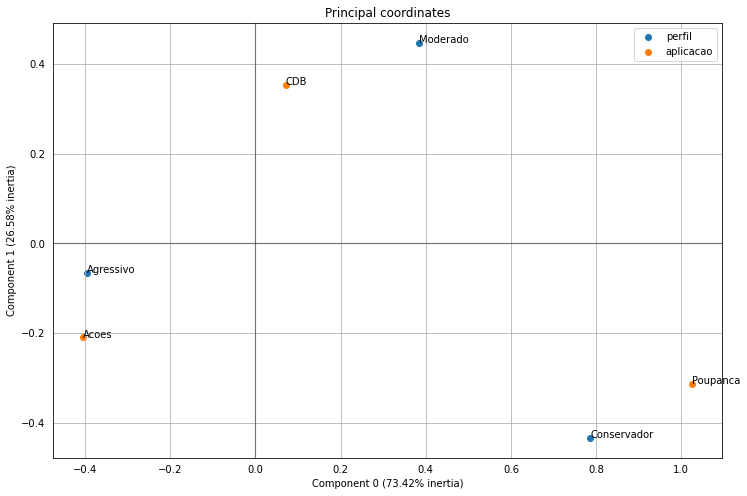

In [41]:
#Plot das coordenadas 

#Criando tabela
ca.plot_coordinates(tab_gl, figsize=(12, 8))
plt.show()

**Resultado do plot da ANACOR**

**Através dos dados, podemos concluir com praticamente 100% de interpretabilidade dos dados que: o Perfil Conservador se assemelha com a aplicação de poupança, Perfil Moderado com a aplicação de CDB e o Perfil Agressivo com Aplicação de Ações**

### OBS: Não podemos interpretar o mapa perceptual sem a tabela de resíduos padronizados ajustados, pois o mapa bidimensional não contem a profundidade dos dados, podendo levar a interpretações errôneas

# Conclusão:

**Na ANACOR usamos 2 variáveis para analise, e como matéria prima do algoritimo fazemos a tabela de contingencia, essa tabela que vai ser determinante para o nosso objetivo, além da tabela de contingencia extrair os Eigenvalues para criação do mapa perceptual, e os Eigenvectors para determinar as coordenadas dos eixos X e Y, que servem como variáveis metricas para a construção do mapa perceptual sem cometer ponderação arbitraria**